In [23]:
import pandas as pd
import numpy as np

In [24]:
data = pd.read_csv("data_coded.csv")
data.head()

,GHO,PUBLISHSTATE,YEAR,REGION,COUNTRY,Display Value,Numeric,Low,High,Comments
0,HIV_0000000001,PUBLISHED,2000,EMR,AFG,1600 [1000–3500],1600.0,1000.0,3500.0,NaN
1,HIV_0000000001,PUBLISHED,2000,EUR,ALB,No data,NaN,NaN,NaN,NaN
2,HIV_0000000001,PUBLISHED,2000,AFR,BDI,130 000 [110 000–150 000],130000.0,110000.0,150000.0,NaN
3,HIV_0000000001,PUBLISHED,2000,AFR,CMR,370 000 [350 000–410 000],370000.0,350000.0,410000.0,NaN
4,HIV_0000000001,PUBLISHED,2000,AMR,CAN,No data,NaN,NaN,NaN,NaN


In [26]:
assert df["YEAR"].dtypes == np.int64

AssertionError: 

In [3]:
#data file is saved as df
df = data

In [5]:
#Created new file so that I can select only few columns from the original file
df1= df
df1.head()

,GHO,PUBLISHSTATE,YEAR,REGION,COUNTRY,Display Value,Numeric,Low,High,Comments
0,HIV_0000000001,PUBLISHED,2000,EMR,AFG,1600 [1000–3500],1600.0,1000.0,3500.0,NaN
1,HIV_0000000001,PUBLISHED,2000,EUR,ALB,No data,NaN,NaN,NaN,NaN
2,HIV_0000000001,PUBLISHED,2000,AFR,BDI,130 000 [110 000–150 000],130000.0,110000.0,150000.0,NaN
3,HIV_0000000001,PUBLISHED,2000,AFR,CMR,370 000 [350 000–410 000],370000.0,350000.0,410000.0,NaN
4,HIV_0000000001,PUBLISHED,2000,AMR,CAN,No data,NaN,NaN,NaN,NaN


In [6]:
df1 = df1[['YEAR', 'REGION','COUNTRY', 'Numeric']]

In [7]:
df1.head()

,YEAR,REGION,COUNTRY,Numeric
0,2000,EMR,AFG,1600.0
1,2000,EUR,ALB,NaN
2,2000,AFR,BDI,130000.0
3,2000,AFR,CMR,370000.0
4,2000,AMR,CAN,NaN


In [8]:
#To remove NaN that has no data from the countries were removed
df1 = df1.dropna()
df1.head()

,YEAR,REGION,COUNTRY,Numeric
0,2000,EMR,AFG,1600.0
2,2000,AFR,BDI,130000.0
3,2000,AFR,CMR,370000.0
5,2000,AFR,CPV,1600.0
6,2000,AFR,CAF,160000.0


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

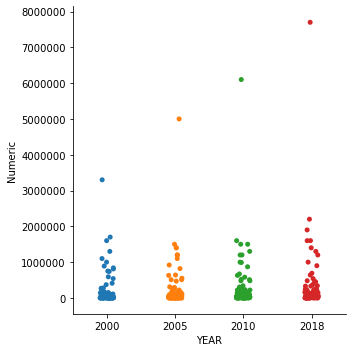

In [10]:
#To see the distribution of incidence of HIV based on the years
sns.catplot(x="YEAR", y="Numeric", data=df1)

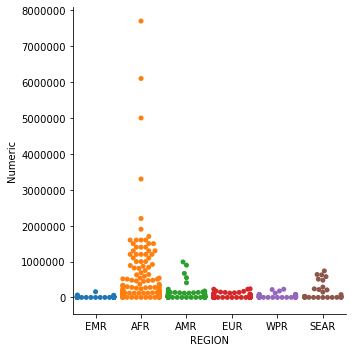

In [11]:
#Next addressed which part of the world has more HIV cases
sns.catplot(x="REGION", y="Numeric", kind = "swarm", data=df1)

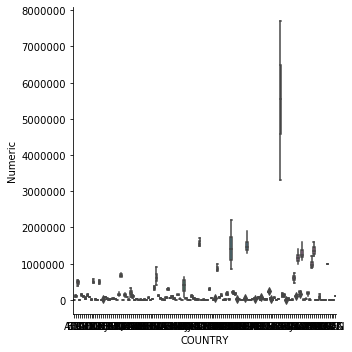

In [12]:
#The data shows that Africa has more incidence compared to other parts of
#the world. Just for clarification I tried to compare which country in Africa 
# has more HIV cases
sns.catplot(x="COUNTRY", y="Numeric", kind = "box", data=df1)

In [13]:
#since it is difficult to know which countries has more incidence I selected 
#the population which has more than 1000000 incidences
df2 = df1[df1['Numeric']>1000000]

In [14]:
df2

,YEAR,REGION,COUNTRY,Numeric
83,2000,AFR,KEN,1700000.0
114,2000,AFR,NGA,1300000.0
140,2000,AFR,ZAF,3300000.0
161,2000,AFR,TZA,1100000.0
169,2000,AFR,ZWE,1600000.0
252,2005,AFR,KEN,1500000.0
289,2005,AFR,MOZ,1200000.0
297,2005,AFR,NGA,1400000.0
310,2005,AFR,ZAF,5000000.0
315,2005,AFR,ZWE,1400000.0


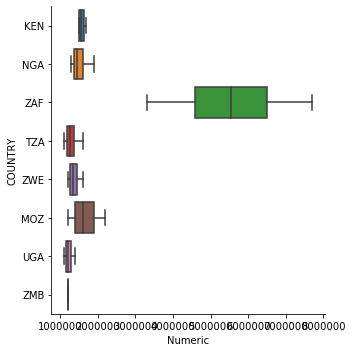

In [15]:
#As observed above all the high incidence is from African continent
#again plotted to see which country in Africa has more incidence of HIV
sns.catplot(x="Numeric", y="COUNTRY", kind = "box", data=df2)

In [16]:
# the ZAF referred as South Africa and it has higher incidence of HIV cases 
#compared to all the other african countries

In [17]:
#Next I wanted to check which countries have higher incidence and from which continent
# I know I can write a loop function but I used alternative way to create new files
df3 = df1[df1['Numeric']<1000000]

In [18]:
df4 = df3[df3['Numeric']>700000]
df4

,YEAR,REGION,COUNTRY,Numeric
31,2000,AFR,ETH,750000.0
95,2000,AFR,MWI,810000.0
106,2000,AFR,MOZ,840000.0
150,2000,SEAR,THA,740000.0
168,2000,AFR,ZMB,890000.0
241,2005,AFR,MWI,820000.0
314,2005,AFR,ZMB,920000.0
435,2010,AFR,MWI,870000.0
502,2010,AMR,USA,990000.0
531,2018,AMR,BRA,900000.0


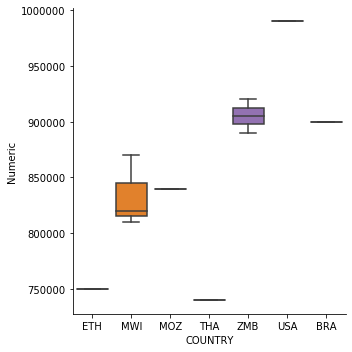

In [19]:
#Well this was scary that USA comes under second category which has higher 
#incidence of HIV cases.
sns.catplot(x="COUNTRY", y="Numeric", kind = "box", data=df4)

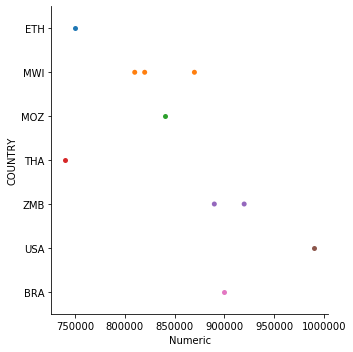

In [20]:
#Since the boxplot is not the right plot, I have generated as swarm plot to 
#indicate the incidence of HIV cases in the second category
sns.catplot(y="COUNTRY", x="Numeric", kind = "swarm", data=df4)